# 1.Importing the dataset



In [ ]:
from google.colab import files
uploaded = files.upload()


Saving heart.csv to heart (1).csv


# 2.Importing Important Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import lite

In [ ]:
data = pd.read_csv("heart.csv")

# 3.About the data

In [ ]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The dataset conists of 14 attributes of a patient that can aid in predicting whether or not a patient has heart disease.
The dataset has 303 examples that will be used in modeling.

**The Attributes**


1.   age - which conists of the different ages of the patients
2.   sex - the gender of the patients, 1 is for males while 0 is for females
3. cp - chest pain type, ranging from 0 to 3
4. trestbps - resting blood pressure.
5. chol - serum cholestrol, representing the total amount of cholestrol in the patient's blood
6. fbs - fasting blood sugar - measure of your blood sugar after an overnight fast, >120mg/dl
7. restecg - resting electrocardiograph results, values ranging between 0, 1 and 2
8. thalach - maximum heart rate achieved.
9. exang - exercise induced angina -chest pain caused by reduced blood flow to the heart muscles.
10. oldpeak - ST deperession (on the ECG) induced by exercise.
11. slope - slope of the peak exercise ST segment.
12. ca - number of major vessels ranging from 0-3 coloured by fluorosopy
13. thal - thalassemia which is a blood disorder that causes your blood to have less haemoglobin than normal.
14. target - 0 to indicate no presence of heart disease and 1 to indicate presence of heart disease.



# 4.Exploratory Data Analysis (EDA)

For the exploratory data analysis we will check the following:


*   Missing Values
*   The data types of the values
*   Take a look ate the features one by one
*   Check the correlation of the values in the dataset.



In [ ]:
data.shape

(303, 14)

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


From the description we can come up with the following conclusions:


*   The average age of the patients is 55, the youngest being 29 and the oldest being 77.
*   The average blood pressure of the patients is 130
* The average serum cholestrol is 240.
* The maximum heart rate is 202, the minimum heart rate is 71 while the average heart rate is 153



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The dataset consists of values that are purely numerical values. This easens the data cleaning process as there is no encoding needed.

## 4.1 Filling missing values

In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The data has no missing values we therefore are able to skip this step

## 4.2 Feature Analysis

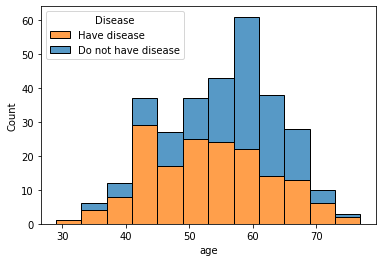

In [ ]:
# Age
sns.histplot(data=data, x='age',hue='target',multiple='stack')
plt.legend(title ='Disease',labels =['Have disease','Do not have disease'])
plt.show()


In [ ]:
data[data['target']==1]['age'].describe()

count    165.000000
mean      52.496970
std        9.550651
min       29.000000
25%       44.000000
50%       52.000000
75%       59.000000
max       76.000000
Name: age, dtype: float64

In [ ]:
data[data['target']==0]['age'].describe()

count    138.000000
mean      56.601449
std        7.962082
min       35.000000
25%       52.000000
50%       58.000000
75%       62.000000
max       77.000000
Name: age, dtype: float64

According to the statistics above, young people from the age of 30 are more susceptible to heart disease while fewer older people are getting the disease.

In [ ]:
# Sex
data[data['target']==1]['sex'].value_counts()


1    93
0    72
Name: sex, dtype: int64

In [ ]:
data[data['target']==0]['sex'].value_counts()

1    114
0     24
Name: sex, dtype: int64

There more males than females in the dataset i.e 207 males and 96 females

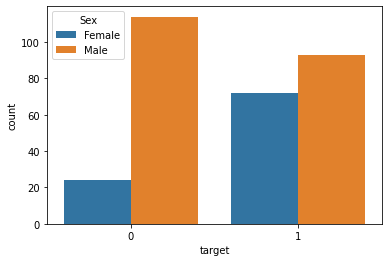

In [ ]:
sns.countplot(x='target', hue='sex', data=data)
plt.legend(title ='Sex',labels =['Female','Male'])
plt.show()

From the analysis we can conclude that:
*   The number of males who have heart disease (1) are more than the number of females.
*   The number of males who do not have the disease (0) are more than females.

This difference is brought about because the dataset has more males than females

In [ ]:
# Chest Pain Type.
data[data['target']==1]['cp'].value_counts()

2    69
1    41
0    39
3    16
Name: cp, dtype: int64

In [ ]:
data[data['target']==0]['cp'].value_counts()

0    104
2     18
1      9
3      7
Name: cp, dtype: int64

Most people in the dataset have 0 chest pains

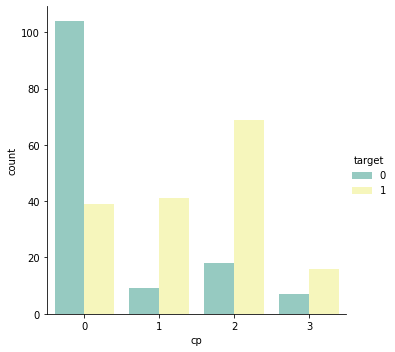

In [ ]:
sns.catplot(x='cp',hue='target', kind='count',data=data, palette='Set3')

The graph above can help us come to the conclusion that most people with the chest pain type 0 do not have disease (0) while most people with any type of chest pain that is 1,2 or 3 have heart disease

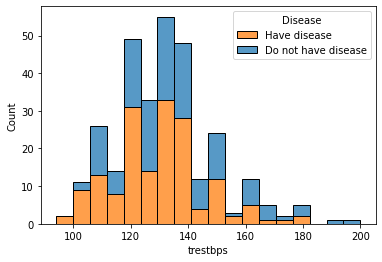

In [ ]:
# trestbps -resting blood pressure.
sns.histplot(data=data, x='trestbps',hue='target',multiple='stack')
plt.legend(title ='Disease',labels =['Have disease','Do not have disease'])
plt.show()

In [ ]:
data[data['target']==1]['trestbps'].describe()

count    165.000000
mean     129.303030
std       16.169613
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      180.000000
Name: trestbps, dtype: float64

In [ ]:
data[data['target']==0]['trestbps'].describe()

count    138.000000
mean     134.398551
std       18.729944
min      100.000000
25%      120.000000
50%      130.000000
75%      144.750000
max      200.000000
Name: trestbps, dtype: float64



*   Blood pressure (BP) is the pressure of circulating blood against the walls of blood vessels. Most of this pressure results from the heart pumping blood through the circulatory system.
*   Blood pressure is usually expressed in terms of the systolic pressure (maximum pressure during one heartbeat) over diastolic pressure (minimum pressure between two heartbeats) in the cardiac cycle. It is measured in millimeters of mercury (mmHg) above the surrounding atmospheric pressure.
*   From the figure above and the desriptive analysis, the people who have heart disease have a lower resting blood sugar.



In [ ]:
# chol - serum cholestrol in mg/dl
data[data['target']==0]['chol'].describe()

count    138.000000
mean     251.086957
std       49.454614
min      131.000000
25%      217.250000
50%      249.000000
75%      283.000000
max      409.000000
Name: chol, dtype: float64

In [ ]:
data[data['target']==1]['chol'].describe()

count    165.000000
mean     242.230303
std       53.552872
min      126.000000
25%      208.000000
50%      234.000000
75%      267.000000
max      564.000000
Name: chol, dtype: float64

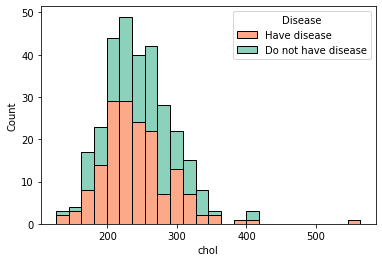

In [ ]:
sns.histplot(data=data, x='chol',hue='target',multiple='stack',palette='Set2')
plt.legend(title ='Disease',labels =['Have disease','Do not have disease'])
plt.show()

From the statistics we can conclude that people with disease have a lower serum cholestrol than people with the disease.

In [ ]:
# fbs- fasting blood sugar
data[data['target']==1]['fbs'].value_counts()

0    142
1     23
Name: fbs, dtype: int64

In [ ]:
data[data['target']==0]['fbs'].value_counts()

0    116
1     22
Name: fbs, dtype: int64

In [ ]:
data['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

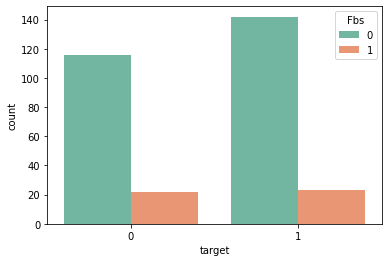

In [ ]:
sns.countplot(x='target', hue='fbs', data=data, palette='Set2')
plt.legend(title ='Fbs',labels =['0','1'])
plt.show()



*   The number of people with fasting blood sugar > 120 mg/dl (class 1) is very small compared to number of people fasting blood sugar < 120 mg/dl (class 0)
*   The number of people that do not have the disease and are in the class 0 are equally as high as the number of people with the disease and are in class 0



In [ ]:
# resting electocardiograph results
data['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [ ]:
data[data['target']==1]['restecg'].value_counts()

1    96
0    68
2     1
Name: restecg, dtype: int64

In [ ]:
data[data['target']==0]['restecg'].value_counts()

0    79
1    56
2     3
Name: restecg, dtype: int64

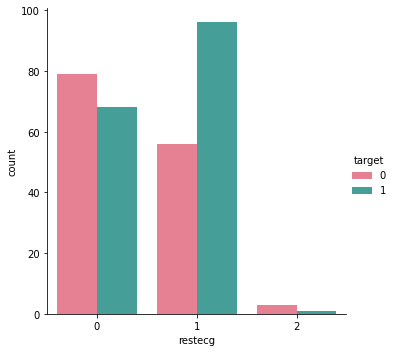

In [ ]:
sns.catplot(x='restecg',hue='target', kind='count',data=data, palette='husl')

Those patients in class 1 have heart disease while patients in the other classe are less likely to have the disease.

In [ ]:
# thalach -maximum heart rate achieved.
data[data['target']==0]['thalach'].describe()

count    138.000000
mean     139.101449
std       22.598782
min       71.000000
25%      125.000000
50%      142.000000
75%      156.000000
max      195.000000
Name: thalach, dtype: float64

In [ ]:
data[data['target']==0]['thalach'].describe()

count    138.000000
mean     139.101449
std       22.598782
min       71.000000
25%      125.000000
50%      142.000000
75%      156.000000
max      195.000000
Name: thalach, dtype: float64

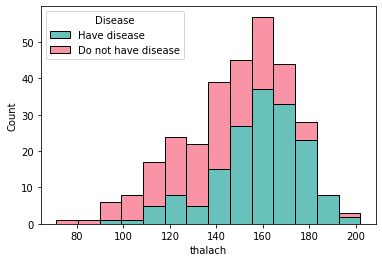

In [ ]:
sns.histplot(data=data, x='thalach',hue='target',multiple='stack',palette='husl')
plt.legend(title ='Disease',labels =['Have disease','Do not have disease'])
plt.show()

People who have heart disease have a higher heart rate achieved than people who do not have heart disease.

In [ ]:
# exang - exercise induced angina
data['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [ ]:
data[data['target']==1]['exang'].value_counts()

0    142
1     23
Name: exang, dtype: int64

In [ ]:
data[data['target']==0]['exang'].value_counts()

1    76
0    62
Name: exang, dtype: int64

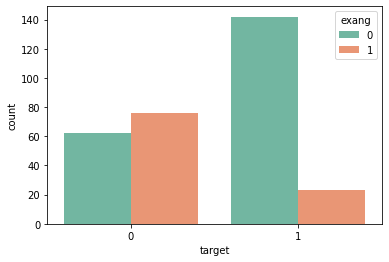

In [ ]:
sns.countplot(x='target', hue='exang', data=data, palette='Set2')
plt.legend(title ='exang',labels =['0','1'])
plt.show()

Most people with the disease fall in the class 0 of this category

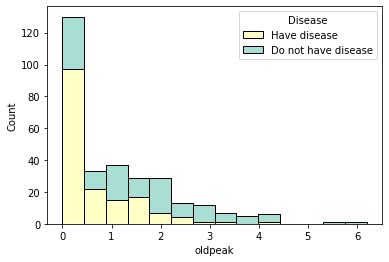

In [ ]:
# oldpeak
sns.histplot(data=data, x='oldpeak',hue='target',multiple='stack',palette='Set3')
plt.legend(title ='Disease',labels =['Have disease','Do not have disease'])
plt.show()

Most people with the disease fall between 0 and 1 while most without the disease fall between 3 and 5

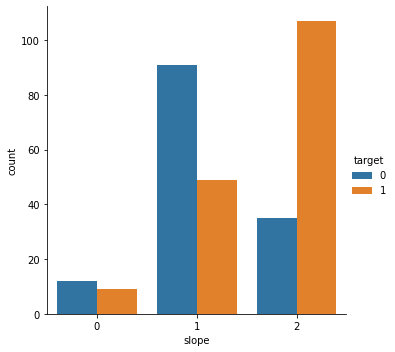

In [ ]:
#slope
sns.catplot(x='slope',hue='target', kind='count',data=data)

Most people with heart disease fall in the class 2 category of this feature while most people without the disease fall in the class 1 category of this feature.

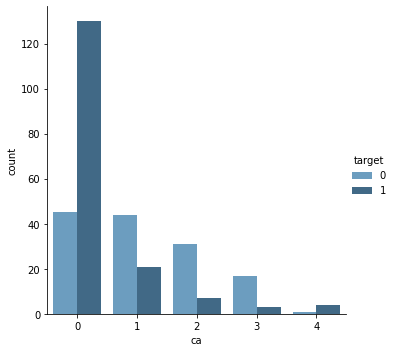

In [ ]:
# ca
sns.catplot(x='ca',hue='target', kind='count',data=data, palette='Blues_d')

Most people with heart disease fall under class 0 of this category while the rest fall in the various different classes

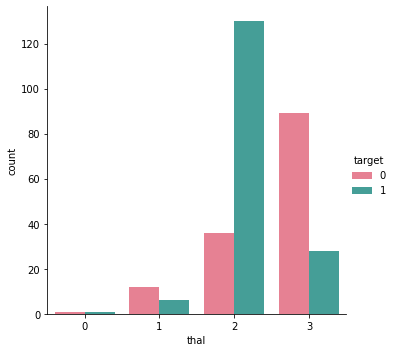

In [ ]:
#thal
sns.catplot(x='thal',hue='target', kind='count',data=data, palette='husl')

Most patients with the disease fall in the class 2 category while those without fall in the class 3 category

## 4.3 Correlation

In [ ]:
# Separate categorical features from numerical features
categorical_featurs = ['sex', 'cp', 'fbs','restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
features = ['age', 'cp', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [ ]:
corelation= data.corr()

<bound method Axes.set_title of <matplotlib.axes._subplots.AxesSubplot object at 0x7fb82c926410>>

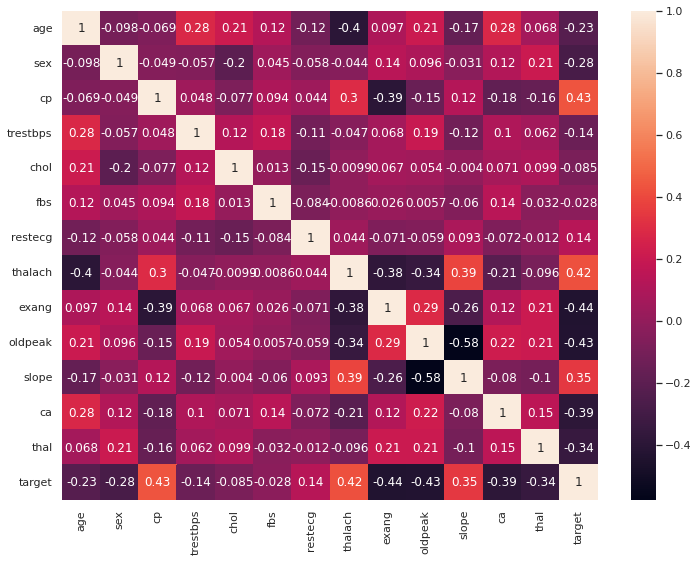

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})

sns.heatmap(corelation, xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True).set_title

From the heat map above we can conclude:

*   All the variables are related to the target either postively or negatively.
*   Some of the values that are strongly corelated to target either postiively or negatively include, restecg, thalach, cp, thal, ca, slope etc

# 5.Training the model

## 5.1 Separate the dependent and independent features

In [ ]:
y=data['target']
X=data.drop('target',axis=1)

In [ ]:
cols=X.columns
cols

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## 5.2 Feature Selection using L1 regression

In [ ]:
regressor=LassoCV()
regressor.fit(X,y)

LassoCV()

In [ ]:
coef_col = (regressor.coef_)
selected_features =(X.columns[(coef_col != 0)])
selected_features

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

After perfoming Lasso regression only one feature was not selected for modeling

In [ ]:
rejected_features =  X.columns[(coef_col == 0)]
rejected_features

Index(['fbs'], dtype='object')

In [ ]:
#Drop the rejected feature 
new_X = data.drop(rejected_features, axis=1)

## 5.3 Splitting the dataset

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(new_X,y,train_size=0.80,random_state=0)

## 5.4 Standardizing

In [ ]:
new_X = StandardScaler().fit_transform(new_X)


## 5.5 Building the models

The project is going to look at 5 machine learning models namely:

*   Naive Bayes
*   Logistic Regression
*   Random Forest Classification
*   KNN (K-Neighbors Classifier)
*   Decision Tree Classifier.

The models will be trained and their metrics will be evaluated to pick the most accurated model that will be used in prediction in the final mobile application.

In [ ]:
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))

LogisticRegression
Confusion Matrix is : 
 [[27  0]
 [ 0 34]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


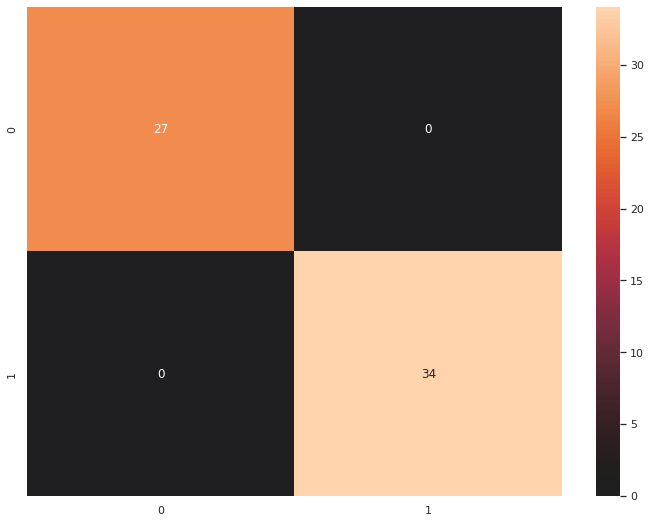

1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

Naive Bayes
Confusion Matrix is : 
 [[27  0]
 [ 0 34]]


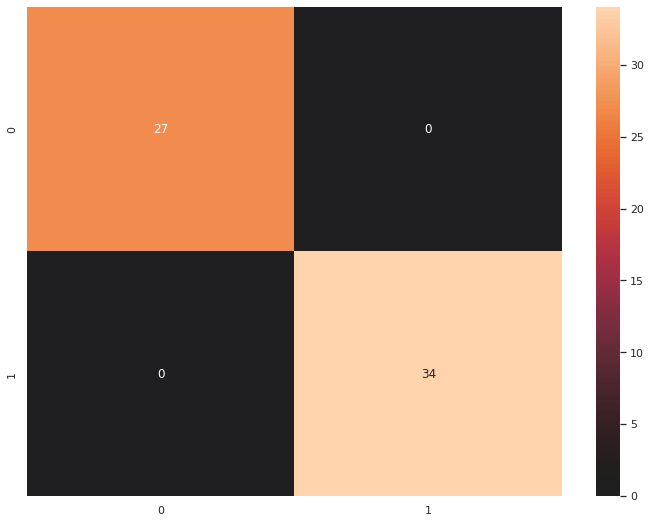

1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

RandomForest
Confusion Matrix is : 
 [[27  0]
 [ 0 34]]


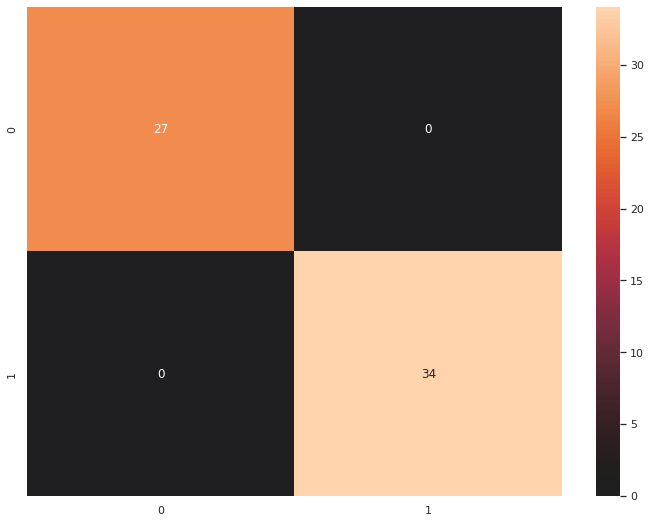

1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

Decision Tree
Confusion Matrix is : 
 [[27  0]
 [ 0 34]]


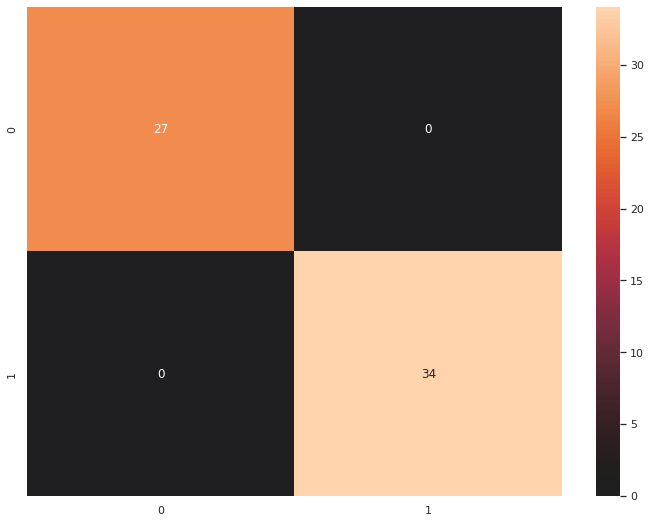

1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       1.00      1.00      1.00        34

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61

KNN
Confusion Matrix is : 
 [[17 10]
 [12 22]]


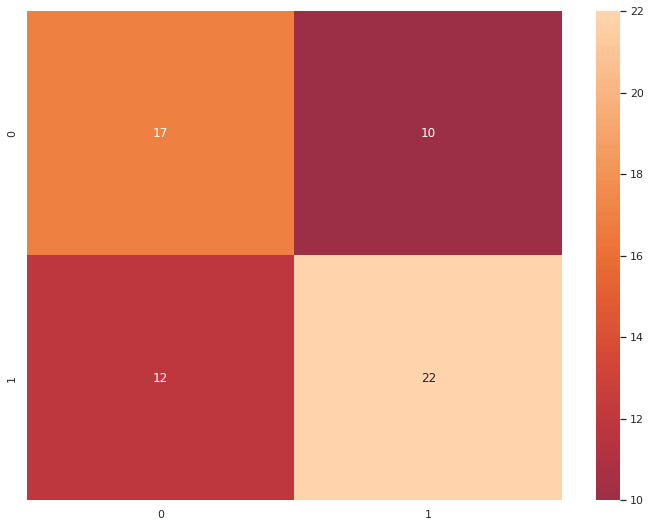

0.639344262295082


              precision    recall  f1-score   support

           0       0.59      0.63      0.61        27
           1       0.69      0.65      0.67        34

    accuracy                           0.64        61
   macro avg       0.64      0.64      0.64        61
weighted avg       0.64      0.64      0.64        61



In [ ]:
# Model Perfomance Evaluation
for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    CM = confusion_matrix(y_test, predictions)
    print('Confusion Matrix is : \n', CM)
    
    # Confusion matrix
    sns.heatmap(CM, center = True , annot=True)
    plt.show()
    
    # Compute accuracy
    print(accuracy_score(predictions,y_test))
    print('\n')
    
    #classification report
    print(classification_report(y_test,predictions))

According to the confusion matrices and classification report, this is what we can conclude from the models:



* The model that perfomed the pooerest was the KNN classifier which had an acuracy of 64%. All the other models did exceptionally well and had high accuracy and F1 scores



## 5.6 Using Tensorflow

In [ ]:
#Convert the target values into categorical data
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)

In [ ]:
# convert into binary classification problem - heart disease or no heart disease
Y_train_binary = y_train.copy()
Y_test_binary = y_test.copy()

Y_train_binary[Y_train_binary > 0] = 1
Y_test_binary[Y_test_binary > 0] = 1

In [ ]:
model=Sequential()

model.add(Dense(16, input_dim=13, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(Adam(learning_rate=0.001),loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train_binary, epochs=30, batch_size=10)

Epoch 1/30
25/25 [==============================] - 1s 1ms/step - loss: 3.1699 - accuracy: 0.5083
Epoch 2/30
25/25 [==============================] - 0s 2ms/step - loss: 1.1066 - accuracy: 0.5579
Epoch 3/30
25/25 [==============================] - 0s 2ms/step - loss: 0.9350 - accuracy: 0.5702
Epoch 4/30
25/25 [==============================] - 0s 2ms/step - loss: 0.9390 - accuracy: 0.5909
Epoch 5/30
25/25 [==============================] - 0s 1ms/step - loss: 0.8309 - accuracy: 0.5950
Epoch 6/30
25/25 [==============================] - 0s 2ms/step - loss: 0.8786 - accuracy: 0.5992
Epoch 7/30
25/25 [==============================] - 0s 2ms/step - loss: 0.7589 - accuracy: 0.6074
Epoch 8/30
25/25 [==============================] - 0s 2ms/step - loss: 0.7341 - accuracy: 0.6157
Epoch 9/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.6777
Epoch 10/30
25/25 [==============================] - 0s 2ms/step - loss: 0.6361 - accuracy: 0.6901
Epoch 11/30
25/25 [

In [ ]:
# Evaluation metrics
prediction = np.round(model.predict(X_test)).astype(int)

print(accuracy_score(Y_test_binary, prediction))
print(classification_report(Y_test_binary, prediction))

0.819672131147541
              precision    recall  f1-score   support

           0       0.72      0.96      0.83        27
           1       0.96      0.71      0.81        34

    accuracy                           0.82        61
   macro avg       0.84      0.83      0.82        61
weighted avg       0.85      0.82      0.82        61



# 6.Converting the model into a tflite file for Deployment on an android application

In [ ]:
converter = lite.TFLiteConverter.from_keras_model(model)

tfmodel = converter.convert()

open('heart.tflite','wb').write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmptrmjzt3i/assets


3280